# GAN with MNIST

https://github.com/golbin/TensorFlow-Tutorials/blob/master/09%20-%20GAN/02%20-%20GAN2.py

위의 Tutorials를 통해 GAN을 구현해볼 것이다. 

In [45]:
# 필요한 모듈 먼저 불러오기
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
tf.reset_default_graph()

# 데이터 불러오기

In [46]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data",one_hot=True)

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


# 변수 설정

In [47]:
total_epochs = 100
batch_size = 100
n_hidden = 256
n_input = 28 * 28 
n_noise = 128
n_class = 10

# Neural Network 구성

In [48]:
X = tf.placeholder(tf.float32,[None,n_input])
Y = tf.placeholder(tf.float32,[None,n_class])
# 노이즈 
Z = tf.placeholder(tf.float32,[None,n_noise])

### Generator

In [49]:
def generator(noise,labels):
    with tf.variable_scope('generator'):
        # noise + labels 펼치기 
        inputs = tf.concat([noise,labels],1)
        
        hidden = tf.layers.dense(inputs,n_hidden,activation=tf.nn.relu)
        output = tf.layers.dense(hidden,n_input,activation=tf.nn.sigmoid)
    return output

### Discriminator

In [50]:
def discriminator(inputs, labels,reuse=None):
    with tf.variable_scope('discriminator') as scope:
        # 가짜 이미지, 실제 이미지 분석을 위해 모델 변수 재사용한다.
        if reuse:
            scope.reuse_variables()
        
        inputs = tf.concat([inputs,labels],1)
        
        hidden = tf.layers.dense(inputs,n_hidden,activation=tf.nn.relu)
        output = tf.layers.dense(hidden,1,activation=None)
    return output
        

In [51]:
# noise 
def get_noise(batch_size,n_noise):
    return np.random.uniform(-1.,1.,size=[batch_size,n_noise])

In [52]:
# 생성 모델과 판별 모델에 labels 정보를 추가하여 정보에 해당하는 이미지 생성하도록 유도
G = generator(Z,Y)
D_real = discriminator(X,Y)
D_fake = discriminator(G,Y,True)

# Loss Function

In [53]:
# 진짜 이미지를 판별하는 D_real은 1에 가깝게
# 가짜 이미지를 판별하는 D_fake는 0에 가깝게 하는 loss

loss_D_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_real,
                                                                    labels=tf.ones_like(D_real)))

loss_D_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_fake,
                                                                    labels=tf.ones_like(D_fake)))

In [54]:
# 위 두 Loss를 더하고 최소화하도록 최적화 
loss_D = loss_D_fake + loss_D_real

In [56]:
# 가짜 이미지를 진짜처럼 만들기 위해 D_fake를 최대한 1에 가깝게하는 loss
loss_G = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_fake,
                       labels=tf.ones_like(D_fake)))

In [57]:
# discriminator. generator scope에서 사용된 변수 가져오기
vars_D = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES,scope='discriminator')
vars_G = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES,scope='generator')

train_D = tf.train.AdamOptimizer().minimize(loss_D,var_list=vars_D)
train_G = tf.train.AdamOptimizer().minimize(loss_G,var_list=vars_G)

# Model Training

Epoch: 0000 D loss : 1.119e-05 G loss : 4.548e-23


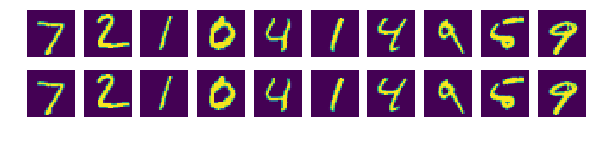

Epoch: 0001 D loss : 1.951e-06 G loss : 4.166e-26
Epoch: 0002 D loss : 7.433e-07 G loss : 5.968e-28
Epoch: 0003 D loss : 1.956e-07 G loss : 2.174e-29
Epoch: 0004 D loss : 1.054e-07 G loss : 1.356e-30
Epoch: 0005 D loss : 1.203e-07 G loss : 1.093e-31
Epoch: 0006 D loss : 1.718e-07 G loss : 1.315e-32
Epoch: 0007 D loss : 1.417e-07 G loss : 1.728e-33
Epoch: 0008 D loss : 3.531e-08 G loss : 2.738e-34
Epoch: 0009 D loss : 5.842e-09 G loss : 4.577e-35


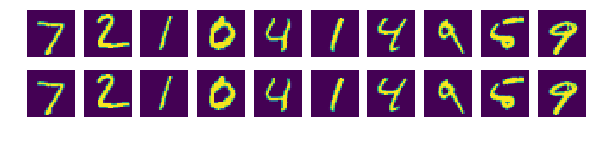

Epoch: 0010 D loss : 2.98e-07 G loss : 7.64e-36
Epoch: 0011 D loss : 2.477e-08 G loss : 1.548e-36
Epoch: 0012 D loss : 1.365e-09 G loss : 2.887e-37
Epoch: 0013 D loss : 1.621e-08 G loss : 5.518e-38
Epoch: 0014 D loss : 6.963e-08 G loss : 0.0
Epoch: 0015 D loss : 1.59e-09 G loss : 0.0
Epoch: 0016 D loss : 2.313e-08 G loss : 0.0
Epoch: 0017 D loss : 6.108e-10 G loss : 0.0
Epoch: 0018 D loss : 3.772e-11 G loss : 0.0
Epoch: 0019 D loss : 1.111e-09 G loss : 0.0


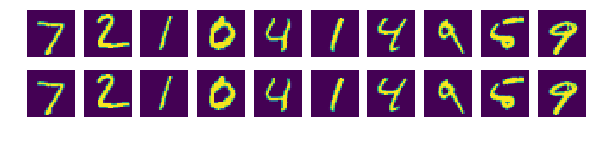

Epoch: 0020 D loss : 2.377e-10 G loss : 0.0
Epoch: 0021 D loss : 1.587e-09 G loss : 0.0
Epoch: 0022 D loss : 5.241e-09 G loss : 0.0
Epoch: 0023 D loss : 3.029e-11 G loss : 0.0
Epoch: 0024 D loss : 1.108e-09 G loss : 0.0
Epoch: 0025 D loss : 1.306e-10 G loss : 0.0
Epoch: 0026 D loss : 6.306e-10 G loss : 0.0
Epoch: 0027 D loss : 7.764e-12 G loss : 0.0
Epoch: 0028 D loss : 2.508e-10 G loss : 0.0
Epoch: 0029 D loss : 8.685e-11 G loss : 0.0


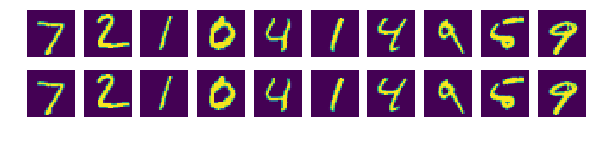

Epoch: 0030 D loss : 6.089e-12 G loss : 0.0
Epoch: 0031 D loss : 1.563e-12 G loss : 0.0
Epoch: 0032 D loss : 3.443e-14 G loss : 0.0
Epoch: 0033 D loss : 1.722e-11 G loss : 0.0
Epoch: 0034 D loss : 1.199e-11 G loss : 0.0
Epoch: 0035 D loss : 1.258e-12 G loss : 0.0
Epoch: 0036 D loss : 4.999e-12 G loss : 0.0
Epoch: 0037 D loss : 5.815e-13 G loss : 0.0
Epoch: 0038 D loss : 8.315e-13 G loss : 0.0
Epoch: 0039 D loss : 1.858e-12 G loss : 0.0


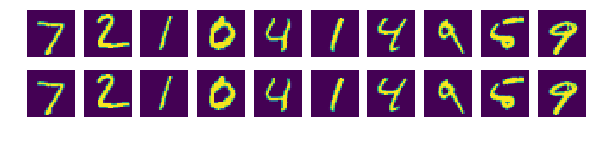

Epoch: 0040 D loss : 2.027e-12 G loss : 0.0
Epoch: 0041 D loss : 4.819e-13 G loss : 0.0
Epoch: 0042 D loss : 5.278e-11 G loss : 0.0
Epoch: 0043 D loss : 3.192e-12 G loss : 0.0
Epoch: 0044 D loss : 5.452e-12 G loss : 0.0
Epoch: 0045 D loss : 3.42e-13 G loss : 0.0
Epoch: 0046 D loss : 9.237e-13 G loss : 0.0
Epoch: 0047 D loss : 4.472e-13 G loss : 0.0
Epoch: 0048 D loss : 1.215e-10 G loss : 0.0
Epoch: 0049 D loss : 1.716e-12 G loss : 0.0


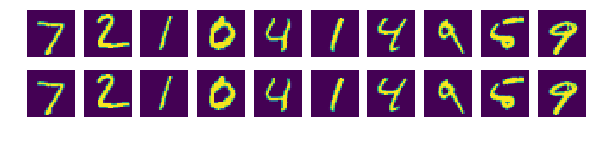

Epoch: 0050 D loss : 6.115e-14 G loss : 0.0
Epoch: 0051 D loss : 1.13e-12 G loss : 0.0
Epoch: 0052 D loss : 3.13e-13 G loss : 0.0
Epoch: 0053 D loss : 5.87e-11 G loss : 0.0
Epoch: 0054 D loss : 4.965e-13 G loss : 0.0
Epoch: 0055 D loss : 6.82e-13 G loss : 0.0
Epoch: 0056 D loss : 2.075e-15 G loss : 0.0
Epoch: 0057 D loss : 7.944e-14 G loss : 0.0
Epoch: 0058 D loss : 2.638e-14 G loss : 0.0
Epoch: 0059 D loss : 1.878e-13 G loss : 0.0


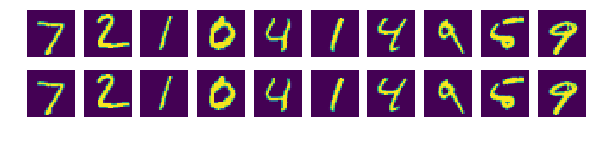

Epoch: 0060 D loss : 3.961e-12 G loss : 0.0
Epoch: 0061 D loss : 5.193e-13 G loss : 0.0
Epoch: 0062 D loss : 1.427e-13 G loss : 0.0
Epoch: 0063 D loss : 1.178e-13 G loss : 0.0
Epoch: 0064 D loss : 8.269e-13 G loss : 0.0
Epoch: 0065 D loss : 4.362e-14 G loss : 0.0
Epoch: 0066 D loss : 5.115e-13 G loss : 0.0
Epoch: 0067 D loss : 1.193e-13 G loss : 0.0
Epoch: 0068 D loss : 4.278e-14 G loss : 0.0
Epoch: 0069 D loss : 3.555e-13 G loss : 0.0


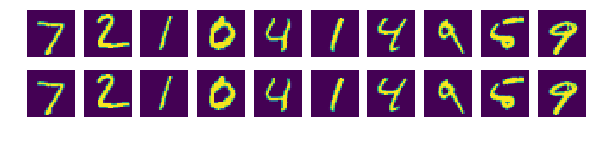

Epoch: 0070 D loss : 9.176e-13 G loss : 0.0
Epoch: 0071 D loss : 4.376e-15 G loss : 0.0
Epoch: 0072 D loss : 4.256e-13 G loss : 0.0
Epoch: 0073 D loss : 1.705e-14 G loss : 0.0
Epoch: 0074 D loss : 1.967e-13 G loss : 0.0
Epoch: 0075 D loss : 3.655e-13 G loss : 0.0
Epoch: 0076 D loss : 5.36e-12 G loss : 0.0
Epoch: 0077 D loss : 8.554e-14 G loss : 0.0
Epoch: 0078 D loss : 9.928e-14 G loss : 0.0
Epoch: 0079 D loss : 1.078e-12 G loss : 0.0


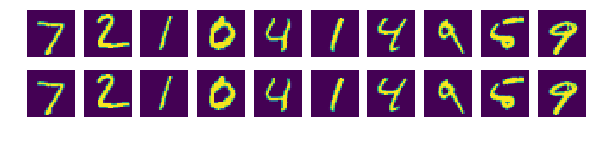

Epoch: 0080 D loss : 1.924e-11 G loss : 0.0
Epoch: 0081 D loss : 9.229e-13 G loss : 0.0
Epoch: 0082 D loss : 1.131e-13 G loss : 0.0
Epoch: 0083 D loss : 4.957e-12 G loss : 0.0
Epoch: 0084 D loss : 2.762e-16 G loss : 0.0
Epoch: 0085 D loss : 1.587e-12 G loss : 0.0
Epoch: 0086 D loss : 8.021e-14 G loss : 0.0
Epoch: 0087 D loss : 1.069e-14 G loss : 0.0
Epoch: 0088 D loss : 3.288e-14 G loss : 0.0
Epoch: 0089 D loss : 6.068e-13 G loss : 0.0


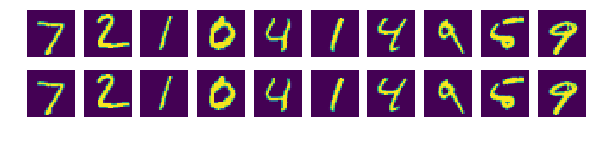

Epoch: 0090 D loss : 3.661e-14 G loss : 0.0
Epoch: 0091 D loss : 2.318e-12 G loss : 0.0
Epoch: 0092 D loss : 2.422e-14 G loss : 0.0
Epoch: 0093 D loss : 2.409e-12 G loss : 0.0
Epoch: 0094 D loss : 9.223e-13 G loss : 0.0
Epoch: 0095 D loss : 3.817e-13 G loss : 0.0
Epoch: 0096 D loss : 7.117e-15 G loss : 0.0
Epoch: 0097 D loss : 6.026e-14 G loss : 0.0
Epoch: 0098 D loss : 2.566e-14 G loss : 0.0
Epoch: 0099 D loss : 4.987e-14 G loss : 0.0


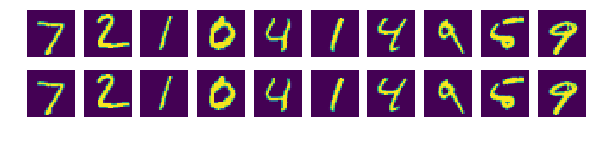

최적화 완료!


In [60]:
total_batch = int(mnist.train.num_examples / batch_size)
loss_val_D, loss_val_G = 0,0

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(total_epochs):
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            noise = get_noise(batch_size,n_noise)
            
            _, loss_val_D = sess.run([train_D,loss_D],feed_dict={X:batch_x,Y:batch_y,Z:noise})
            _, loss_val_G = sess.run([train_G,loss_G], feed_dict={Y:batch_y,Z:noise})
            
        print('Epoch:','%04d' % epoch,
             'D loss : {:.4}'.format(loss_val_D),
             'G loss : {:.4}'.format(loss_val_G))
        
        if epoch == 0 or (epoch + 1) % 10 == 0:
            sample_size = 10
            noise = get_noise(sample_size,n_noise)
            samples = sess.run(G,feed_dict={Y:mnist.test.labels[:sample_size], Z:noise})
            
            fig, ax = plt.subplots(2,sample_size,figsize=(sample_size,2))
            
            for i in range(sample_size):
                ax[0][i].set_axis_off()
                ax[1][i].set_axis_off()
                
                ax[0][i].imshow(np.reshape(mnist.test.images[i], (28,28)))
                ax[1][i].imshow(np.reshape(mnist.test.images[i], (28,28)))
                
            plt.show()
    print('최적화 완료!')
    
    # 2번째 줄에 있는 이미지가 generator을 통해 생성된 MNIST data